In [2]:
raw_label_path = '/hai1/shufxi/data/tamgent/chebi/test.textmol.smi'
label = []

with open(raw_label_path, 'r') as f:
    for line in f:
        line = line.replace('<start-of-mol>', '')
        line = line.replace('<end-of-mol>', '')
        line = line.replace('<m>', '')
        line = line.replace(' ', '')
        label.append(line.strip())

print(len(label))
print('exmaples:')
for i in range(10):
    print(label[i])

3300
exmaples:
COC(=O)/C=C1/CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C)[C@H]3C(=O)C[C@]12C
CC(=O)N[C@@H]1[C@@H](O[C@@H]2O[C@@H](C)[C@@H](O)[C@@H](O)[C@@H]2O)[C@H](O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]2NC(C)=O)[C@@H](CO[C@@H]2O[C@@H](C)[C@@H](O)[C@@H](O)[C@@H]2O)O[C@H]1O
COc1cccc2[nH]cc(C/C(=N/OS(=O)(=O)[O-])S[C@@H]3O[C@H](CO)[C@@H](O)[C@H](O)[C@H]3O)c12
CN(C)C(=O)C(CCN1CCC(O)(c2ccc(Cl)cc2)CC1)(c1ccccc1)c1ccccc1
Cc1ncc(C[n+]2c(C(O)CCC(=O)O)sc(CCOP(=O)(O)OP(=O)(O)O)c2C)c(N)n1
OC[C@@H](O)[C@@H](O)[C@H](O)[C@@H](O)CO
CCCCCCCCCCCCCCCC/C=C\OC[C@@H](O)COP(=O)(O)O
O=[As]([O-])(O)c1ccccc1
CCCCCCCCCCCC(=O)OC(=O)CCCCCCCCCCC
Cc1cccc2c(C(=O)O)cc([O-])cc12


In [7]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

from rdkit import Chem
from rdkit.Chem import MACCSkeys
from rdkit import DataStructs
from rdkit.Chem import AllChem

from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*')

In [4]:
label_mol = []
for smiles in label:
    mol = Chem.MolFromSmiles(smiles)
    label_mol.append(mol)

In [5]:
from tqdm import tqdm

In [6]:
# ref: https://github.com/blender-nlp/MolT5/blob/main/evaluation/fingerprint_metrics.py

def evaluate(pred, morgan_r=2):
    assert len(pred) == len(label_mol), f"{len(pred)} != {len(label_mol)}"
    
    bad_mols = 0
    MACCS_sims = []
    morgan_sims = []
    RDK_sims = []
    exact_match = 0
    
    for i, gt_m in enumerate(tqdm(label_mol)):
        ot_m = Chem.MolFromSmiles(pred[i])
        
        if ot_m is None:
            bad_mols += 1
            continue

        MACCS_sims.append(DataStructs.FingerprintSimilarity(MACCSkeys.GenMACCSKeys(gt_m), MACCSkeys.GenMACCSKeys(ot_m), metric=DataStructs.TanimotoSimilarity))
        RDK_sims.append(DataStructs.FingerprintSimilarity(Chem.RDKFingerprint(gt_m), Chem.RDKFingerprint(ot_m), metric=DataStructs.TanimotoSimilarity))
        morgan_sims.append(DataStructs.TanimotoSimilarity(AllChem.GetMorganFingerprint(gt_m,morgan_r), AllChem.GetMorganFingerprint(ot_m, morgan_r)))

        if Chem.MolToSmiles(gt_m) == Chem.MolToSmiles(ot_m):
            exact_match += 1

    validity_score = 1 - (bad_mols/len(pred))
    maccs_sims_score = np.mean(MACCS_sims)
    rdk_sims_score = np.mean(RDK_sims)
    morgan_sims_score = np.mean(morgan_sims)
    exact_match_score = exact_match/len(pred)
    
    return validity_score, maccs_sims_score, rdk_sims_score, morgan_sims_score, exact_match_score

In [17]:
scores = []
steps = [999, 1999, 2999, 3999, 4999, 5999, 6999, 7999, 8999, 9999, 10999, 11999, 12999, 13999, 14999, 15999]
done_steps = []
for step in steps:
    pred_file = f'/hai1/shufxi/scigpt/stageB/eval/chebi/pred_step{step}.txt'
    pred = [l.strip() for l in open(pred_file, 'r').readlines()]
    if not pred:
        continue
    done_steps.append(step+1)
    scores.append(evaluate(pred))
    print(f'step {step} done.')

  1%|▏         | 43/3300 [00:00<00:07, 428.08it/s]

100%|██████████| 3300/3300 [00:05<00:00, 551.03it/s]


step 999 done.


100%|██████████| 3300/3300 [00:10<00:00, 319.04it/s]


step 1999 done.


100%|██████████| 3300/3300 [00:08<00:00, 367.11it/s]


step 2999 done.


100%|██████████| 3300/3300 [00:09<00:00, 345.52it/s]


step 3999 done.


100%|██████████| 3300/3300 [00:10<00:00, 329.13it/s]


step 4999 done.


100%|██████████| 3300/3300 [00:09<00:00, 336.80it/s]


step 5999 done.


100%|██████████| 3300/3300 [00:09<00:00, 335.16it/s]


step 6999 done.


100%|██████████| 3300/3300 [00:09<00:00, 337.82it/s]


step 7999 done.


100%|██████████| 3300/3300 [00:09<00:00, 330.52it/s]


step 8999 done.


100%|██████████| 3300/3300 [00:09<00:00, 335.06it/s]


step 9999 done.


100%|██████████| 3300/3300 [00:09<00:00, 334.13it/s]


step 10999 done.


100%|██████████| 3300/3300 [00:10<00:00, 323.56it/s]


step 11999 done.


100%|██████████| 3300/3300 [00:10<00:00, 328.57it/s]


step 12999 done.


100%|██████████| 3300/3300 [00:09<00:00, 331.88it/s]


step 13999 done.


100%|██████████| 3300/3300 [00:09<00:00, 332.31it/s]


step 14999 done.


100%|██████████| 3300/3300 [00:10<00:00, 327.67it/s]

step 15999 done.


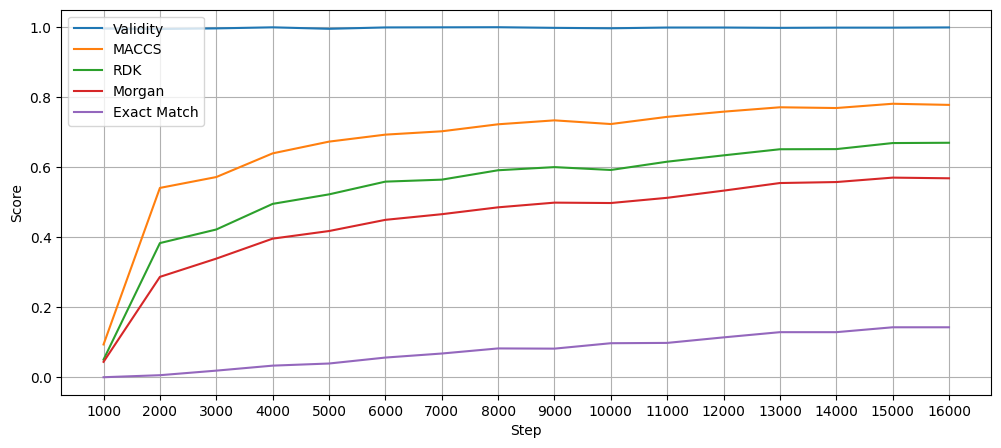

In [18]:
plt.figure(figsize=(12, 5))
plt.plot(scores)
plt.legend(['Validity', 'MACCS', 'RDK', 'Morgan', 'Exact Match'])
plt.xticks(range(len(done_steps)), done_steps)
plt.xlabel('Step')
plt.ylabel('Score')
plt.grid(True)
plt.show()

In [19]:
scores

[(0.9948484848484849,
  0.09403689192307714,
  0.050892139827992726,
  0.044494858040860646,
  0.0006060606060606061),
 (0.9936363636363637,
  0.5405054170171152,
  0.3831501656162467,
  0.2868020654492128,
  0.006363636363636364),
 (0.9954545454545455,
  0.57149224295412,
  0.4219308914968858,
  0.3388341900062965,
  0.019393939393939394),
 (0.9984848484848485,
  0.6390454282191109,
  0.49496892855871183,
  0.39583337811210906,
  0.03363636363636364),
 (0.9942424242424243,
  0.6725186300597971,
  0.522077304496055,
  0.41751668019104016,
  0.039696969696969696),
 (0.9981818181818182,
  0.6924501196265848,
  0.558429565181245,
  0.44943888305214674,
  0.056666666666666664),
 (0.9984848484848485,
  0.7019813539036689,
  0.5640700022474103,
  0.46551865716581725,
  0.06818181818181818),
 (0.9987878787878788,
  0.7219623580467674,
  0.5908620356267044,
  0.485127459327713,
  0.08272727272727273),
 (0.996969696969697,
  0.7331805497446485,
  0.599823112296718,
  0.49851015917491603,
  0.08

  2%|▏         | 52/3300 [00:00<00:12, 256.35it/s]

100%|██████████| 3300/3300 [00:12<00:00, 268.58it/s]


step 8999 done.


100%|██████████| 3300/3300 [00:12<00:00, 256.21it/s]


step 17999 done.


100%|██████████| 3300/3300 [00:12<00:00, 260.76it/s]


step 26999 done.
(0.9972727272727273, 0.7298762977142239, 0.6086961347580052, 0.5153903544022489, 0.12515151515151515)
(0.9978787878787879, 0.7988725597519267, 0.6884125182645336, 0.5928802916647754, 0.18242424242424243)
(0.9963636363636363, 0.8121196948684953, 0.7088572438280911, 0.6198365418779972, 0.21606060606060606)


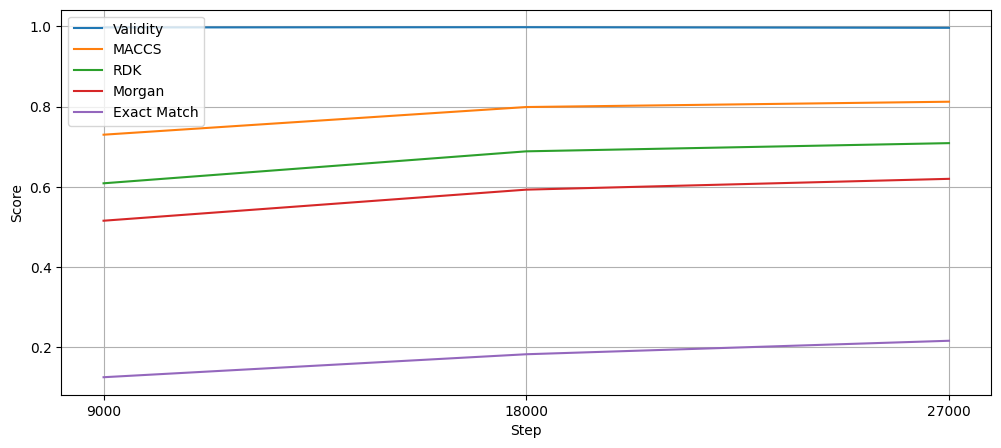

In [11]:
scores = []
steps = [8999, 17999, 26999]
done_steps = []
for step in steps:
    pred_file = f'/hai1/shufxi/scigpt/7bv2/stageB/eval/chebi/pred_step{step}.txt'
    pred = [l.strip() for l in open(pred_file, 'r').readlines()]
    if not pred:
        print('no pred of file', pred_file)
        continue
    done_steps.append(step+1)
    scores.append(evaluate(pred))
    print(f'step {step} done.')

for score in scores:
    print(score)

plt.figure(figsize=(12, 5))
plt.plot(scores)
plt.legend(['Validity', 'MACCS', 'RDK', 'Morgan', 'Exact Match'])
plt.xticks(range(len(done_steps)), done_steps)
plt.xlabel('Step')
plt.ylabel('Score')
plt.grid(True)
plt.show()